# Creating Token Embedding

The data is already almost ready for an LLM

But lastly let us embed the tokens in a continuous vector representation using an embedding layer

Usually, these embedding layers are part of the LLM itself and are updated (trained) during model training

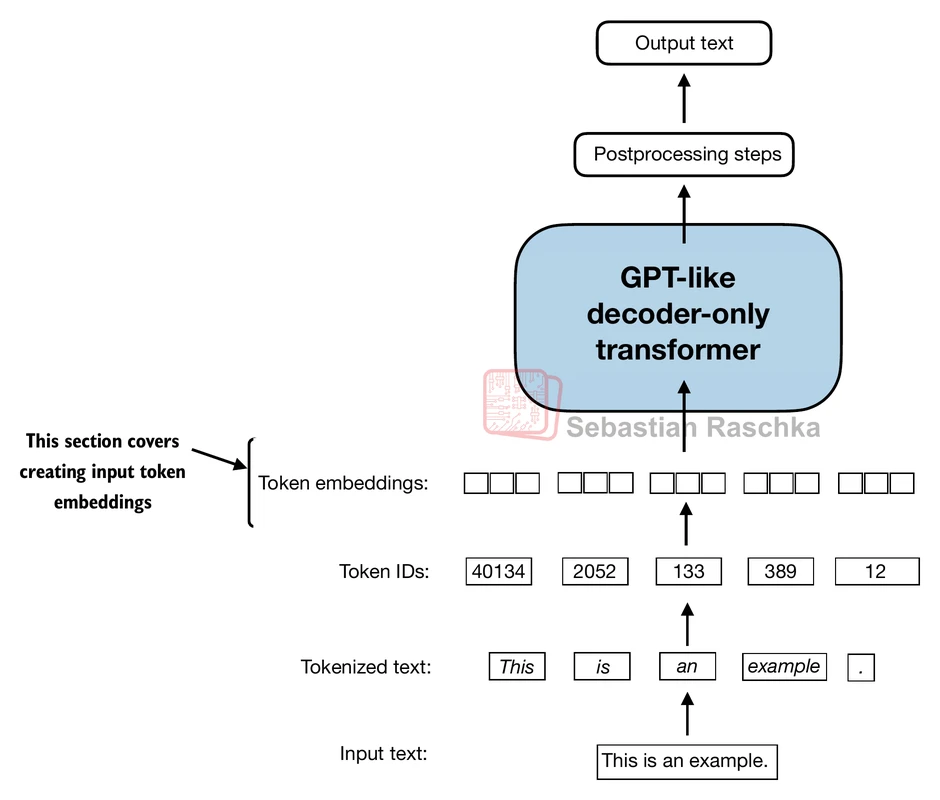

Let's illustrate how the token ID to embedding vector conversion works with a hands-on example. Suppose we have the following four input tokens with IDs 2, 3, 5, and 1:

In [1]:
import torch

In [2]:
input_ids = torch.tensor([2, 3, 5, 1])

For the sake of simplicity and illustration purposes, suppose we have a small vocabulary of only 6 words (instead of the 50,257 words in the BPE tokenizer vocabulary), and we want to create embeddings of size 3 (in GPT-3, the embedding size is 12,288 dimensions):

Using the vocab_size and output_dim, we can instantiate an embedding layer in PyTorch, setting the random seed to 123 for reproducibility purposes:

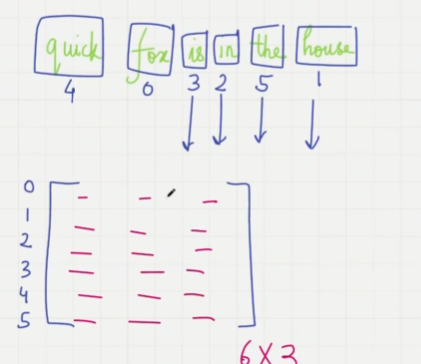

In [3]:
vocab_size = 6
output_dim = 3

torch.manual_seed(124)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [5]:
print(embedding_layer)
print(embedding_layer.weight)

Embedding(6, 3)
Parameter containing:
tensor([[-0.5728,  0.2498, -1.2034],
        [-1.5485, -0.2655,  0.8484],
        [ 0.8453, -1.4826,  0.1986],
        [ 0.1190, -0.8403,  1.4388],
        [-0.9206,  0.1130, -0.7559],
        [-0.3033, -1.6082,  1.0092]], requires_grad=True)


We can see that the weight matrix of the embedding layer contains small, random values. These values are optimized during LLM training as part of the LLM optimization itself, as we will see in upcoming chapters. Moreover, we can see that the weight matrix has six rows and three columns. There is one row for each of the six possible tokens in the vocabulary. And there is one column for each of the three embedding dimensions.

After we instantiated the embedding layer, let's now apply it to a token ID to obtain the embedding vector:

In [6]:
print(embedding_layer(torch.tensor([3])))

tensor([[ 0.1190, -0.8403,  1.4388]], grad_fn=<EmbeddingBackward0>)


If we compare the embedding vector for token ID 3 to the previous embedding matrix, we see that it is identical to the 4th row (Python starts with a zero index, so it's the row corresponding to index 3). In other words, the embedding layer is essentially a look-up operation that retrieves rows from the embedding layer's weight matrix via a token ID.

Previously, we have seen how to convert a single token ID into a three-dimensional embedding vector. Let's now apply that to all four input IDs we defined earlier (torch.tensor([2, 3, 5, 1])):

In [ ]:
print(embedding_layer(input_ids))

tensor([[ 0.8453, -1.4826,  0.1986],
        [ 0.1190, -0.8403,  1.4388],
        [-0.3033, -1.6082,  1.0092],
        [-1.5485, -0.2655,  0.8484]], grad_fn=<EmbeddingBackward0>)


An embedding layer is essentially a look-up operation:

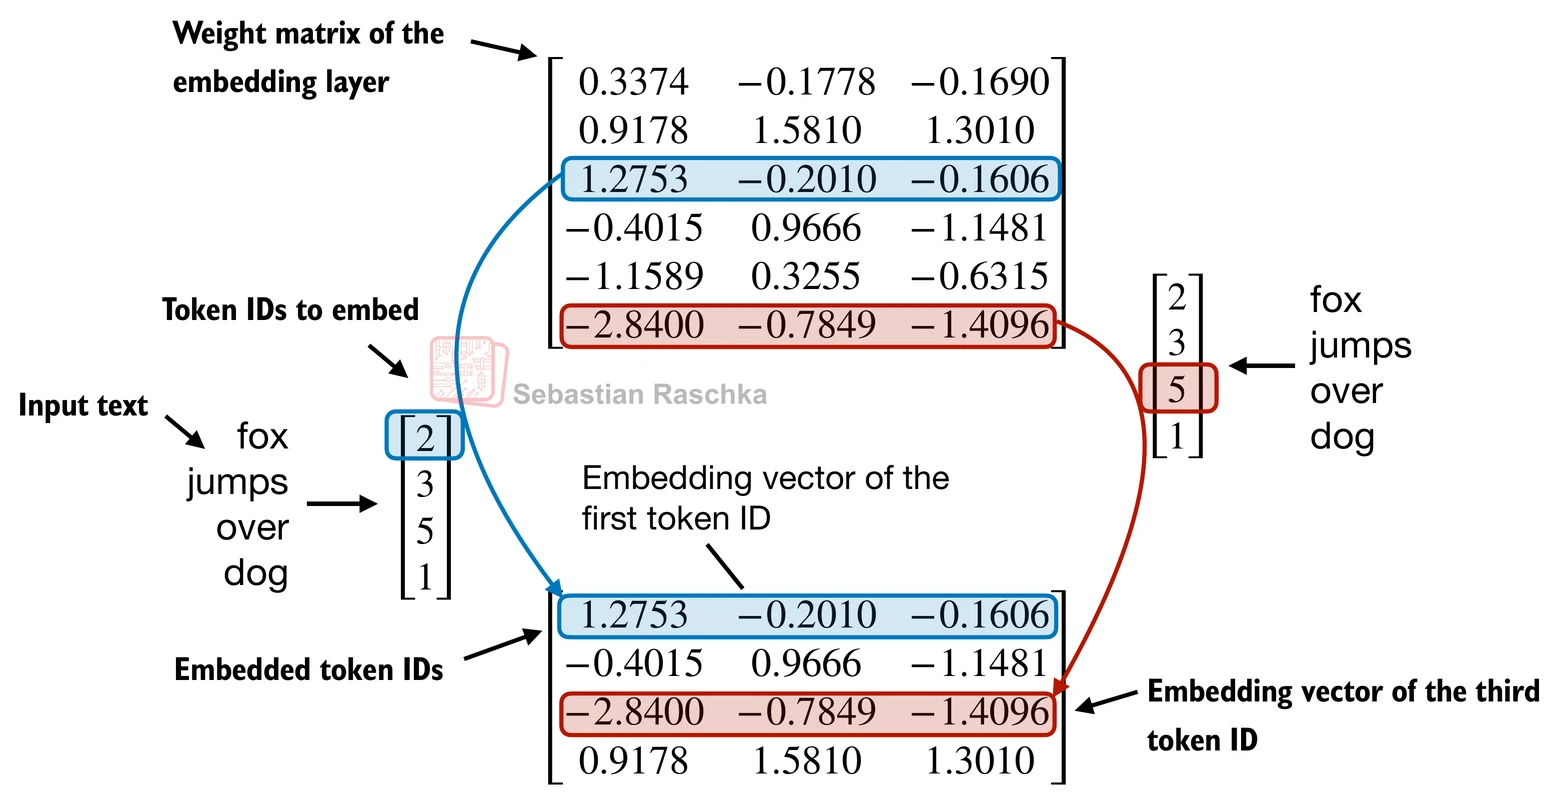